In [41]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [42]:
#Importing and reading the csv file
resale_prices_df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
resale_prices_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [43]:
#Data Cleaning

resale_prices_df.isnull().value_counts()   #checking for missing values

#No missing values found

month  town   flat_type  block  street_name  storey_range  floor_area_sqm  flat_model  lease_commence_date  remaining_lease  resale_price
False  False  False      False  False        False         False           False       False                False            False           134168
dtype: int64

In [44]:
#Data Cleaning

resale_prices_df[resale_prices_df.duplicated()]    #checking for duplicated rows/rows with the exact same info

#Out of 134,168 records, 259 have duplicated info. These will be accepted as valid transactions as proportion is negligible (0.19% of rows are duplicated) and possibility of flats in the same location range being sold at the same price cannot be discarded.

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
510,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
591,2017-01,JURONG WEST,4 ROOM,337A,TAH CHING RD,19 TO 21,92.0,Model A,2010,92 years 03 months,470000.0
672,2017-01,PASIR RIS,4 ROOM,753,PASIR RIS ST 71,01 TO 03,105.0,Model A,1996,78 years 10 months,368000.0
...,...,...,...,...,...,...,...,...,...,...,...
126578,2022-05,KALLANG/WHAMPOA,4 ROOM,10C,BENDEMEER RD,37 TO 39,93.0,Model A,2017,94 years 07 months,940000.0
129523,2022-06,TOA PAYOH,5 ROOM,11,JOO SENG RD,07 TO 09,123.0,Improved,1983,59 years 11 months,640000.0
131188,2022-07,PUNGGOL,5 ROOM,130,EDGEDALE PLAINS,07 TO 09,111.0,Premium Apartment,2003,80 years 05 months,490000.0
131201,2022-07,PUNGGOL,5 ROOM,669A,EDGEFIELD PLAINS,07 TO 09,112.0,Premium Apartment,2016,93 years,738000.0


In [45]:
def remaining_lease_clean(lease):                          #converting remaining_lease string data into float
    year = lease[:2]
    if 'months' in lease or 'month' in lease:              #some rows dont have a month aspect, so an if statement is used to filter them out first
        month = lease[-8]
        return int(year)+(int(month)/12)
    else:
        return int(year)                                  #this command applies to rows with no month aspect

resale_prices_df['Remaining Lease in Years']=resale_prices_df['remaining_lease'].apply(remaining_lease_clean)
resale_prices_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Remaining Lease in Years
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,61.333333
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,60.583333
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,62.416667
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,62.000000
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,62.416667
...,...,...,...,...,...,...,...,...,...,...,...,...
134163,2022-08,YISHUN,5 ROOM,850,YISHUN ST 81,01 TO 03,122.0,Improved,1988,65 years,570000.0,65.000000
134164,2022-08,YISHUN,EXECUTIVE,325,YISHUN CTRL,07 TO 09,146.0,Maisonette,1988,65 years 04 months,768888.0,65.333333
134165,2022-08,YISHUN,EXECUTIVE,355,YISHUN RING RD,07 TO 09,150.0,Maisonette,1988,65 years 04 months,778000.0,65.333333
134166,2022-08,YISHUN,EXECUTIVE,355,YISHUN RING RD,07 TO 09,146.0,Maisonette,1988,65 years 04 months,838000.0,65.333333


In [46]:
#Are more resale flats being transacted from 2017 onwards?

resale_prices_df['month'] = pd.to_datetime(resale_prices_df['month'])    #convert column 'month' to datetime
resale_prices_df['Year'] = resale_prices_df['month'].dt.year             #Extracting the year from the datetime data
resale_prices_df.insert(loc=1, column ='year', value=resale_prices_df['Year'])    #inserting year data to be beside the datetime data to make it more neat
resale_prices_df.drop('Year',axis=1,inplace= True) #dropping the extra 'Year' column
resale_prices_df                   



,month,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Remaining Lease in Years
0,2017-01-01,2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,61.333333
1,2017-01-01,2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,60.583333
2,2017-01-01,2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,62.416667
3,2017-01-01,2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,62.000000
4,2017-01-01,2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,62.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134163,2022-08-01,2022,YISHUN,5 ROOM,850,YISHUN ST 81,01 TO 03,122.0,Improved,1988,65 years,570000.0,65.000000
134164,2022-08-01,2022,YISHUN,EXECUTIVE,325,YISHUN CTRL,07 TO 09,146.0,Maisonette,1988,65 years 04 months,768888.0,65.333333
134165,2022-08-01,2022,YISHUN,EXECUTIVE,355,YISHUN RING RD,07 TO 09,150.0,Maisonette,1988,65 years 04 months,778000.0,65.333333
134166,2022-08-01,2022,YISHUN,EXECUTIVE,355,YISHUN RING RD,07 TO 09,146.0,Maisonette,1988,65 years 04 months,838000.0,65.333333


In [47]:
resale_prices_df.groupby(by='year').count()   #counting the number of transactions registered per year

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Remaining Lease in Years
year,,,,,,,,,,,,
2017,20509,20509,20509,20509,20509,20509,20509,20509,20509,20509,20509,20509
2018,21561,21561,21561,21561,21561,21561,21561,21561,21561,21561,21561,21561
2019,22186,22186,22186,22186,22186,22186,22186,22186,22186,22186,22186,22186
2020,23333,23333,23333,23333,23333,23333,23333,23333,23333,23333,23333,23333
2021,29087,29087,29087,29087,29087,29087,29087,29087,29087,29087,29087,29087
2022,17492,17492,17492,17492,17492,17492,17492,17492,17492,17492,17492,17492


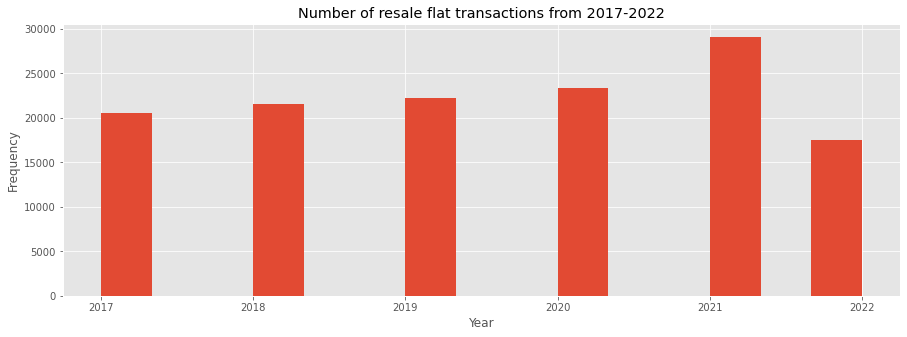

In [48]:
#Are more resale flats being transacted from 2017 onwards?
plt.style.use('ggplot')
fig1,ax = plt.subplots(figsize = (15,5))
resale_prices_df['year'].plot(kind = 'hist', ax=ax,bins=15)   #Plotting histogram to map out the number of transactions over the years
ax.set_xlabel('Year')
ax.set_title('Number of resale flat transactions from 2017-2022')
fig1.savefig('C:/Users/USER/Documents/DS102 - Data Analytics/Final Project/Trend of Resale Flat Transactions.png')

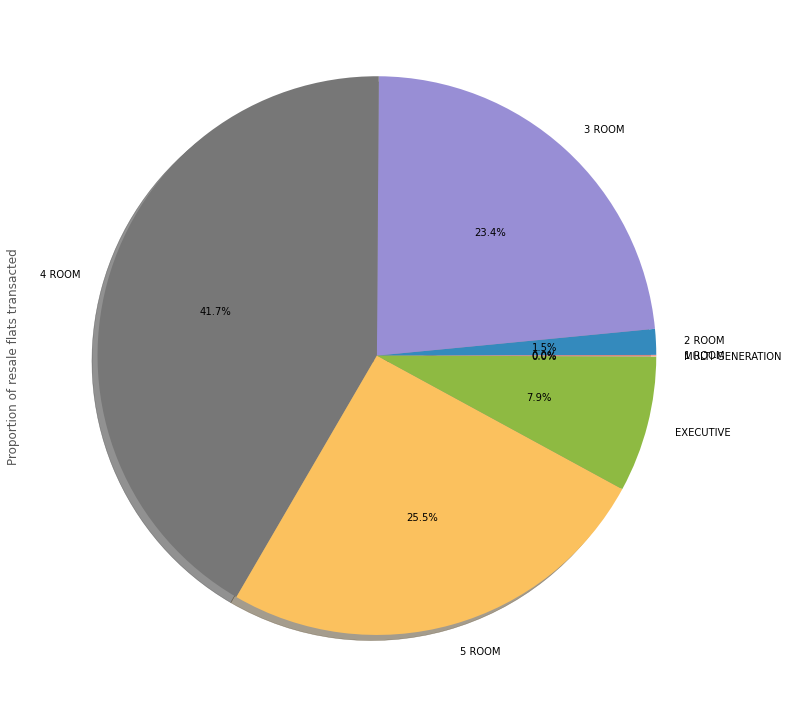

In [49]:
#Are more resale flats being transacted from 2017 onwards? (Additional piece of analysis)
flat_types_volume = resale_prices_df.groupby(by = 'flat_type').count()
fig2,ax = plt.subplots(figsize = (15,10))
flat_types_volume.plot(kind='pie',y='year',legend = False,ax=ax,label= 'Proportion of resale flats transacted',startangle=0,shadow=True, autopct = '%1.1f%%')   #Plotting pie chart to illustrate the proportion of the flat types being transacted.
fig2.tight_layout()
fig2.set_facecolor('white')
fig2.savefig('C:/Users/USER/Documents/DS102 - Data Analytics/Final Project/Pie Chart of Resale Flat Transactions.png')

In [50]:
#What are the average transacted prices of the different flat types in the different towns? Which towns are most desirable and which are least desirable

resale_prices_df['flat_type'].value_counts()


4 ROOM              55974
5 ROOM              34156
3 ROOM              31343
EXECUTIVE           10576
2 ROOM               1997
MULTI-GENERATION       66
1 ROOM                 56
Name: flat_type, dtype: int64

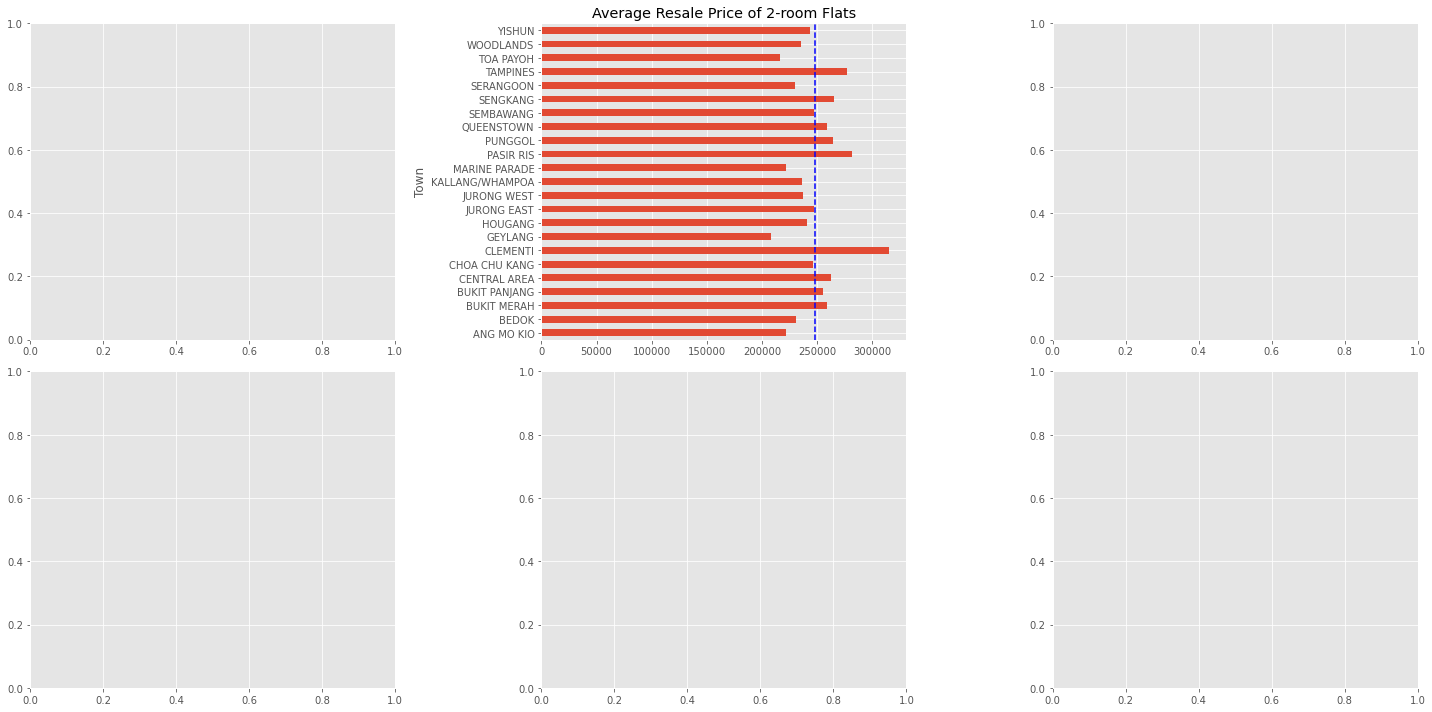

In [51]:
#What are the average transacted prices of the different flat types in the different towns? Which towns are most desirable and which are least desirable
two_room_df = resale_prices_df.loc[(resale_prices_df['flat_type'] == '2 ROOM'),:]    #Slicing the main dataframe to narrow down to 2-room flats
mean_two_room_df = two_room_df.groupby(by='town').mean()                             #finding the mean all numeric columns in the 2-room flat dataframe
mean_two_room_df.reset_index(inplace=True)                                           #reset index to remove ' town' column as index and place into the dataframe 
fig3,[[ax0,ax1,ax2],[ax3,ax4,ax5]] = plt.subplots(nrows = 2, ncols = 3, figsize=(20,10))
mean_two_room_df.plot(x='town',y='resale_price',kind='barh',xlabel = 'Town',ylabel='Average Resale Price', title = 'Average Resale Price of 2-room Flats',ax=ax1,legend=False)
mean_two_room_overall = mean_two_room_df['resale_price'].mean()                     #indicating the overall average price
ax1.axvline(mean_two_room_overall,ls = '--',color = 'b',label = True)
fig3.tight_layout()

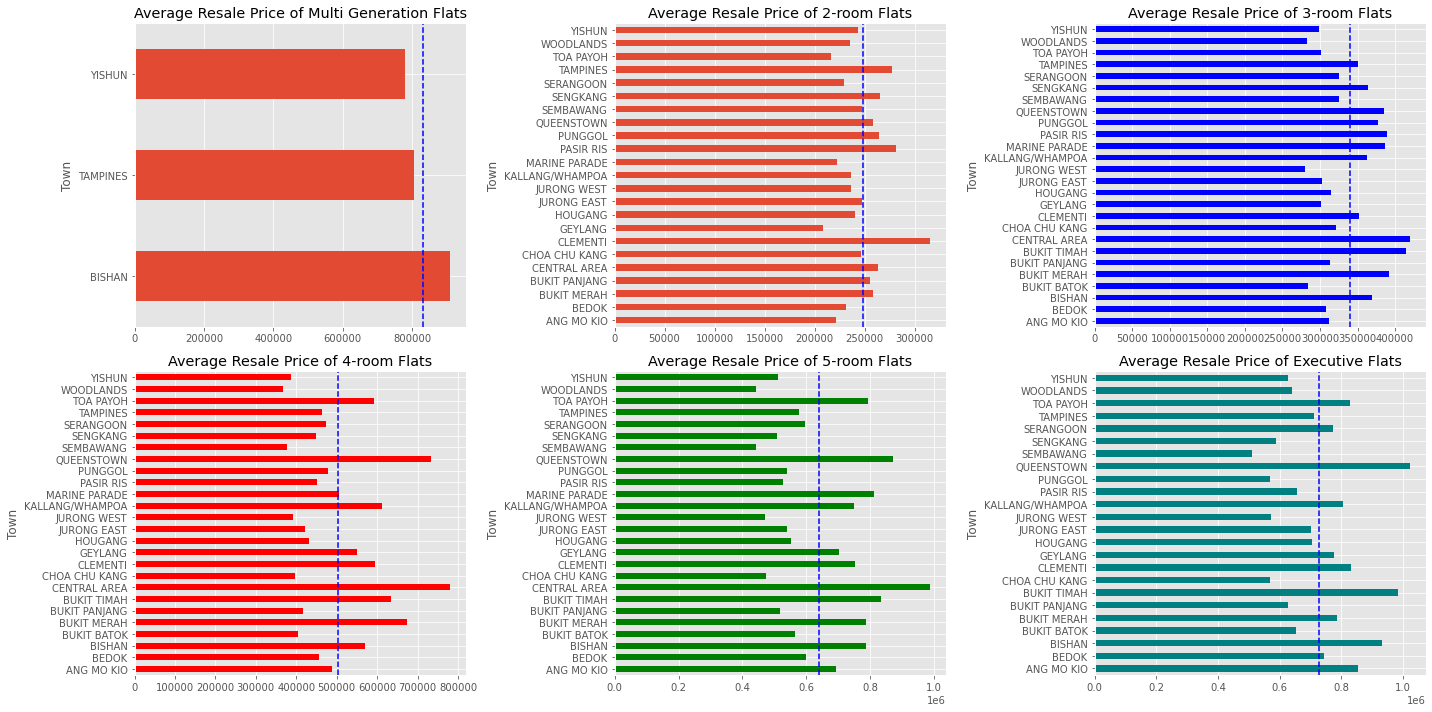

In [52]:
#What are the average transacted prices of the different flat types in the different towns? Which towns are most desirable and which are least desirable
one_room_df = resale_prices_df.loc[(resale_prices_df['flat_type'] == '1 ROOM'),:]    #Doing the same for all other flat types
mean_one_room_df = one_room_df.groupby(by='town').mean()                             
mean_one_room_df.reset_index(inplace=True)                                            


three_room_df = resale_prices_df.loc[(resale_prices_df['flat_type'] == '3 ROOM'),:]    #Doing the same for all other flat types
mean_three_room_df = three_room_df.groupby(by='town').mean()                             
mean_three_room_df.reset_index(inplace=True)                                            
mean_three_room_df.plot(x='town',y='resale_price',kind='barh',xlabel = 'Town',ylabel='Average Resale Price', title = 'Average Resale Price of 3-room Flats',ax=ax2,legend=False,color='b')
mean_three_room_overall = mean_three_room_df['resale_price'].mean()                     
ax2.axvline(mean_three_room_overall,ls = '--',color = 'b',label = True)

four_room_df = resale_prices_df.loc[(resale_prices_df['flat_type'] == '4 ROOM'),:]    #Doing the same for all other flat types
mean_four_room_df = four_room_df.groupby(by='town').mean()                             
mean_four_room_df.reset_index(inplace=True)                                            
mean_four_room_df.plot(x='town',y='resale_price',kind='barh',xlabel = 'Town',ylabel='Average Resale Price', title = 'Average Resale Price of 4-room Flats',ax=ax3,legend=False,color='r')
mean_four_room_overall = mean_four_room_df['resale_price'].mean()                     
ax3.axvline(mean_four_room_overall,ls = '--',color = 'b',label = True)

five_room_df = resale_prices_df.loc[(resale_prices_df['flat_type'] == '5 ROOM'),:]    #Doing the same for all other flat types
mean_five_room_df = five_room_df.groupby(by='town').mean()                             
mean_five_room_df.reset_index(inplace=True)                                            
mean_five_room_df.plot(x='town',y='resale_price',kind='barh',xlabel = 'Town',ylabel='Average Resale Price', title = 'Average Resale Price of 5-room Flats',ax=ax4,legend=False,color='green')
mean_five_room_overall = mean_five_room_df['resale_price'].mean()                     
ax4.axvline(mean_five_room_overall,ls = '--',color = 'b',label = True)

exec_df = resale_prices_df.loc[(resale_prices_df['flat_type'] == 'EXECUTIVE'),:]    #Doing the same for all other flat types
mean_exec_df = exec_df.groupby(by='town').mean()                             
mean_exec_df.reset_index(inplace=True)                                            
mean_exec_df.plot(x='town',y='resale_price',kind='barh',xlabel = 'Town',ylabel='Average Resale Price', title = 'Average Resale Price of Executive Flats',ax=ax5,legend=False,color = 'teal')
mean_exec_overall = mean_exec_df['resale_price'].mean()                     
ax5.axvline(mean_exec_overall,ls = '--',color = 'b',label = True)

multigen_df = resale_prices_df.loc[(resale_prices_df['flat_type'] == 'MULTI-GENERATION'),:]    #Doing the same for all other flat types
mean_multigen_df = multigen_df.groupby(by='town').mean()                             
mean_multigen_df.reset_index(inplace=True)                                            
mean_multigen_df.plot(x='town',y='resale_price',kind='barh',xlabel = 'Town',ylabel='Average Resale Price', title = 'Average Resale Price of Multi Generation Flats',ax=ax0,legend=False,)
mean_multigen_overall = mean_multigen_df['resale_price'].mean()                     
ax0.axvline(mean_multigen_overall,ls = '--',color = 'b',label = True)
fig3.tight_layout()
fig3.set_facecolor('white')
fig3.savefig('C:/Users/USER/Documents/DS102 - Data Analytics/Final Project/Analysis of Prices of Flat Types by Location.png')
fig3



In [53]:
mean_one_room_df      #1-room flats are only located in Bukit Merah in the dataset, hence no plot.

,town,year,floor_area_sqm,lease_commence_date,resale_price,Remaining Lease in Years
0,BUKIT MERAH,2019.446429,31.0,1975.0,193111.928571,54.15625


In [54]:
mean_multigen_overall

830860.202020202

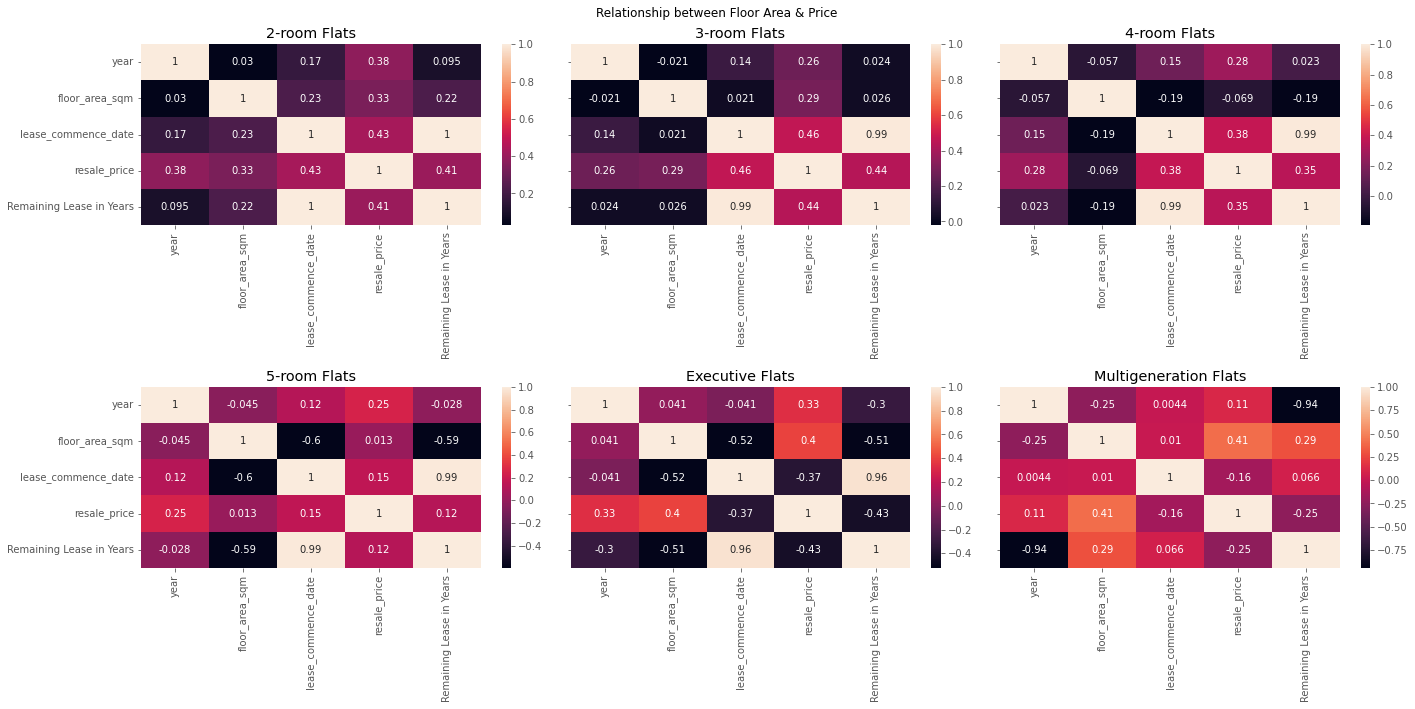

In [55]:
# Is there a correlation between floor area and price?

 #Finding correlation between floor area and price for all the different types of flats

fig4,[[ax0,ax1,ax2],[ax3,ax4,ax5]] = plt.subplots(nrows = 2, ncols = 3, figsize=(20,10),sharey=True)
fig4.set_facecolor('white')
fig4.suptitle('Relationship between Floor Area & Price')
sns.heatmap(two_room_df.corr(),annot=True,ax=ax0,)   #Plotting heatmap to show correlation between price and floor area
ax0.set_title('2-room Flats')

sns.heatmap(three_room_df.corr(),annot=True,ax=ax1)
ax1.set_title('3-room Flats')

sns.heatmap(four_room_df.corr(),annot=True,ax=ax2)
ax2.set_title('4-room Flats')

sns.heatmap(five_room_df.corr(),annot=True,ax=ax3)
ax3.set_title('5-room Flats')

sns.heatmap(exec_df.corr(),annot=True,ax=ax4)
ax4.set_title('Executive Flats')

sns.heatmap(multigen_df.corr(),annot=True,ax=ax5)
ax5.set_title('Multigeneration Flats')

fig4.tight_layout()

fig4.savefig('C:/Users/USER/Documents/DS102 - Data Analytics/Final Project/Relationship between floor area & resale price')

#for 1 room flats, there is no correlation to speak of as all flats transacted are of the same floor size.


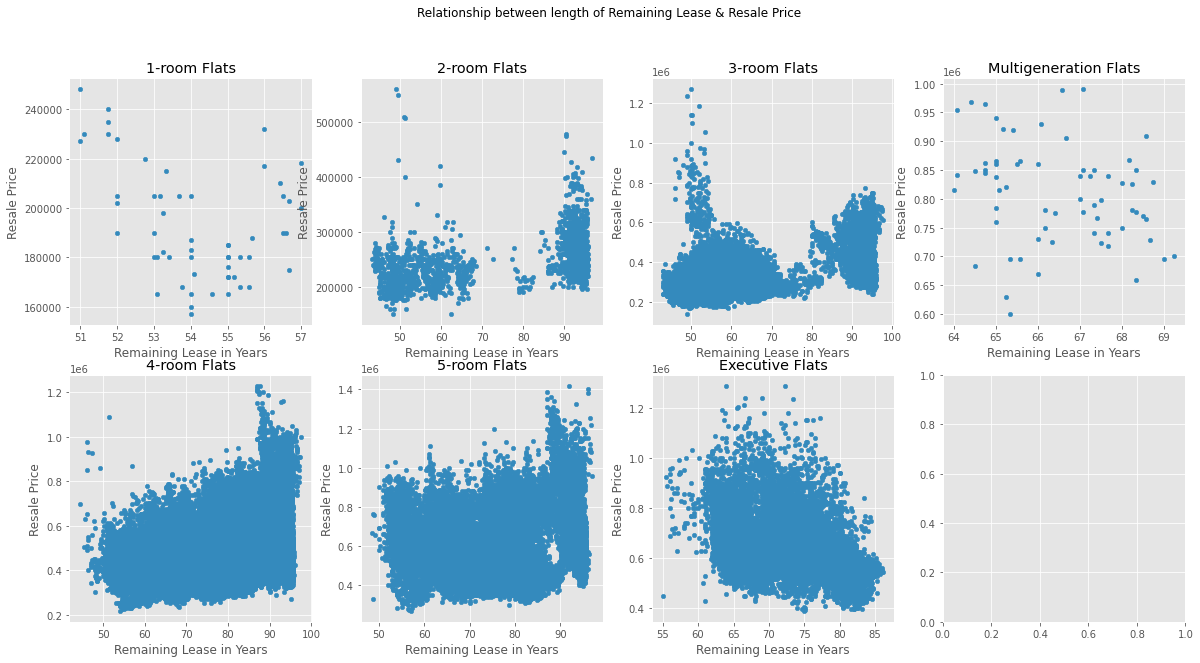

In [56]:
# Is there a correlation between remaining lease and price?

fig5,[[ax0,ax1,ax2,ax6],[ax3,ax4,ax5,ax7]] = plt.subplots(nrows = 2, ncols = 4, figsize=(20,10))
fig5.set_facecolor('white')
fig5.suptitle('Relationship between length of Remaining Lease & Resale Price')

one_room_df_sorted = one_room_df.sort_values(by='Remaining Lease in Years',ascending=True)
one_room_df_sorted.plot(x = 'Remaining Lease in Years', y='resale_price',kind='scatter', xlabel = 'Remaining Lease in Years',ylabel = 'Resale Price', title = '1-room Flats',legend=False, ax=ax0)

two_room_df_sorted = two_room_df.sort_values(by='Remaining Lease in Years',ascending = True)
two_room_df_sorted.plot(x = 'Remaining Lease in Years', y='resale_price',kind='scatter', xlabel = 'Remaining Lease in Years',ylabel = 'Resale Price', title = '2-room Flats',legend=False, ax=ax1)

three_room_df_sorted = three_room_df.sort_values(by='Remaining Lease in Years',ascending=True)
three_room_df_sorted.plot(x = 'Remaining Lease in Years', y='resale_price',kind='scatter', xlabel = 'Remaining Lease in Years',ylabel = 'Resale Price', title = '3-room Flats',legend=False, ax=ax2)

four_room_df_sorted = four_room_df.sort_values(by='Remaining Lease in Years',ascending=True)
four_room_df_sorted.plot(x = 'Remaining Lease in Years', y='resale_price',kind = 'scatter', xlabel = 'Remaining Lease in Years',ylabel = 'Resale Price', title = '4-room Flats',legend=False, ax=ax3)

five_room_df_sorted = five_room_df.sort_values(by='Remaining Lease in Years',ascending=True)
five_room_df_sorted.plot(x = 'Remaining Lease in Years', y='resale_price',kind='scatter', xlabel = 'Remaining Lease in Years',ylabel = 'Resale Price', title = '5-room Flats',legend=False, ax=ax4)

exec_df_sorted = exec_df.sort_values(by='Remaining Lease in Years',ascending=True)
exec_df_sorted.plot(x = 'Remaining Lease in Years', y='resale_price',kind='scatter',xlabel = 'Remaining Lease in Years',ylabel = 'Resale Price', title = 'Executive Flats',legend=False, ax=ax5)

multigen_df_sorted = multigen_df.sort_values(by='Remaining Lease in Years',ascending=True)
multigen_df_sorted.plot(x = 'Remaining Lease in Years', y='resale_price',kind='scatter',xlabel = 'Remaining Lease in Years',ylabel = 'Resale Price', title = 'Multigeneration Flats',legend=False,ax=ax6)

fig5.tight_layout

fig5.savefig('C:/Users/USER/Documents/DS102 - Data Analytics/Final Project/Relationship between Length of remaining lease & resale price.png')





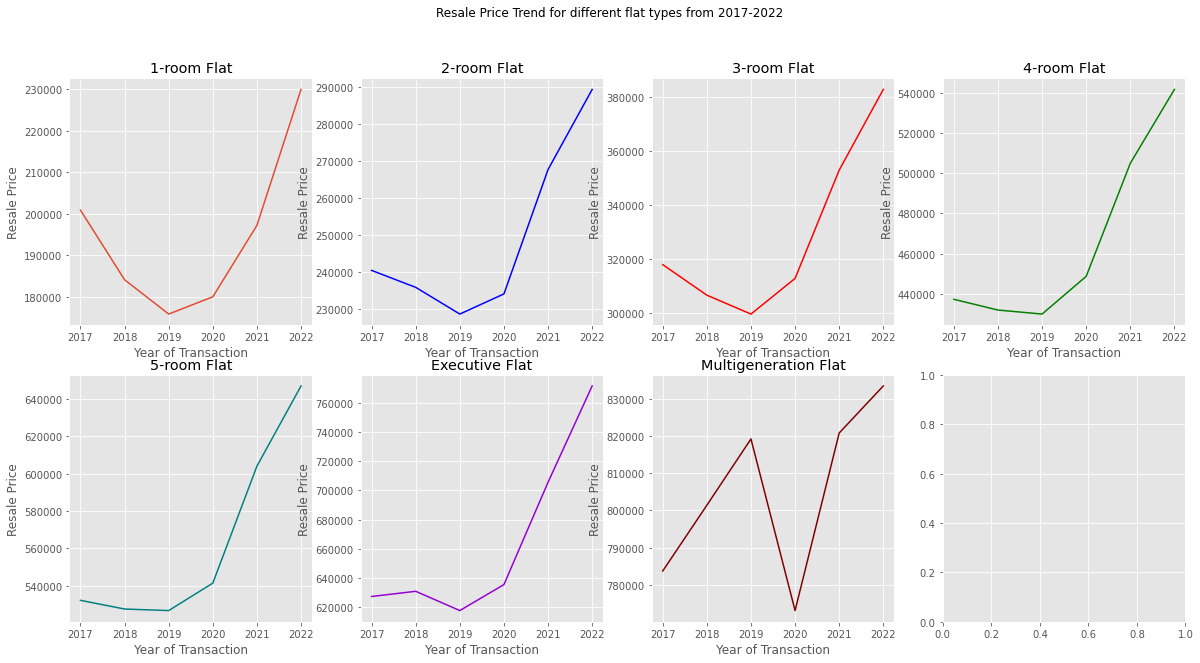

In [57]:
#How has the prices of resale flats changed over the years?

fig6,[[ax0,ax1,ax2,ax3],[ax4,ax5,ax6,ax7]] = plt.subplots(nrows = 2, ncols = 4, figsize=(20,10))
fig6.set_facecolor('white')
fig6.suptitle('Resale Price Trend for different flat types from 2017-2022')

one_room_df_by_year = one_room_df.groupby(by='year').mean()    #group by year to find the mean prices for different years and save it into a variable
one_room_df_by_year.reset_index(inplace=True)           
one_room_df_by_year.plot(x='year',y='resale_price',xlabel = 'Year of Transaction',ylabel = 'Resale Price',title='1-room Flat',ax=ax0,legend=False)   #plotting year vs resale price for 1 room flats from 2017-2022

two_room_df_by_year = two_room_df.groupby(by='year').mean() #repeat for all other flat types
two_room_df_by_year.reset_index(inplace=True)
two_room_df_by_year.plot(x='year',y='resale_price',xlabel = 'Year of Transaction',ylabel = 'Resale Price',title='2-room Flat',ax=ax1,legend=False,color='b')

three_room_df_by_year = three_room_df.groupby(by='year').mean()
three_room_df_by_year.reset_index(inplace=True)
three_room_df_by_year.plot(x='year',y='resale_price',xlabel = 'Year of Transaction',ylabel = 'Resale Price',title='3-room Flat',ax=ax2,legend=False,color='red')

four_room_df_by_year = four_room_df.groupby(by='year').mean()
four_room_df_by_year.reset_index(inplace=True)
four_room_df_by_year.plot(x='year',y='resale_price',xlabel = 'Year of Transaction',ylabel = 'Resale Price',title='4-room Flat',ax=ax3,legend=False,color = 'green')

five_room_df_by_year = five_room_df.groupby(by='year').mean()
five_room_df_by_year.reset_index(inplace=True)
five_room_df_by_year.plot(x='year',y='resale_price',xlabel = 'Year of Transaction',ylabel = 'Resale Price',title='5-room Flat',ax=ax4,legend=False,color='teal')

exec_df_by_year = exec_df.groupby(by='year').mean()
exec_df_by_year.reset_index(inplace=True)
exec_df_by_year.plot(x='year',y='resale_price',xlabel = 'Year of Transaction',ylabel = 'Resale Price',title='Executive Flat',ax=ax5,legend=False,color='darkviolet')

multigen_df_by_year = multigen_df.groupby(by='year').mean()
multigen_df_by_year.reset_index(inplace=True)
multigen_df_by_year.plot(x='year',y='resale_price',xlabel = 'Year of Transaction',ylabel = 'Resale Price',title='Multigeneration Flat',ax=ax6,legend=False,color='maroon')

fig6.tight_layout

fig6.savefig('C:/Users/USER/Documents/DS102 - Data Analytics/Final Project/Resale price trend for different flat types.png')






In [58]:
#What buying advice to give a friend who is looking to buy a resale flat under $400k in the west of Singapore? (i.e. what kind of flats are available and at which locations?)

resale_prices_df['town'].unique()    #find out which towns are in the dataframe. Bukit Batok, Bukit Panjang, CCK,Clementi, Jurong East & Jurong West identified to be West towns.

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [59]:
west_towns=['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST']   #make a list of towns in the west
resale_prices_df_west = resale_prices_df[resale_prices_df['town'].isin(west_towns)]                 #filter the dataframe based on the list
resale_prices_df_west

,month,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Remaining Lease in Years
148,2017-01-01,2017,BUKIT BATOK,3 ROOM,342,BT BATOK ST 34,01 TO 03,64.0,Simplified,1987,69 years 11 months,255000.0,69.083333
149,2017-01-01,2017,BUKIT BATOK,3 ROOM,530,BT BATOK ST 51,04 TO 06,64.0,Simplified,1987,69 years 06 months,255000.0,69.500000
150,2017-01-01,2017,BUKIT BATOK,3 ROOM,145,BT BATOK ST 11,04 TO 06,68.0,New Generation,1984,66 years 05 months,260000.0,66.416667
151,2017-01-01,2017,BUKIT BATOK,3 ROOM,528,BT BATOK ST 51,10 TO 12,60.0,Improved,1987,69 years 06 months,260000.0,69.500000
152,2017-01-01,2017,BUKIT BATOK,3 ROOM,537,BT BATOK ST 52,01 TO 03,73.0,Model A,1987,69 years 04 months,260000.0,69.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133121,2022-08-01,2022,JURONG WEST,EXECUTIVE,831,JURONG WEST ST 81,13 TO 15,145.0,Apartment,1993,69 years 10 months,645000.0,69.000000
133122,2022-08-01,2022,JURONG WEST,EXECUTIVE,841,JURONG WEST ST 81,01 TO 03,147.0,Apartment,1993,69 years 11 months,600000.0,69.083333
133123,2022-08-01,2022,JURONG WEST,EXECUTIVE,910,JURONG WEST ST 91,01 TO 03,145.0,Maisonette,1988,65 years 02 months,668000.0,65.166667
133124,2022-08-01,2022,JURONG WEST,EXECUTIVE,331,TAH CHING RD,04 TO 06,139.0,Apartment,1996,73 years 05 months,715000.0,73.416667


In [60]:
resale_prices_df_west_recent = resale_prices_df_west.loc[(resale_prices_df_west['year']==2020)|(resale_prices_df_west['year']==2021)|(resale_prices_df_west['year']==2022),:]  #further filter to the last 2 years (2020-2022)
resale_prices_df_west_recent.groupby(by=['town','flat_type'])['resale_price'].mean()


town           flat_type
BUKIT BATOK    3 ROOM       312694.113086
               4 ROOM       436668.313776
               5 ROOM       605221.308571
               EXECUTIVE    681663.015625
BUKIT PANJANG  2 ROOM       264609.797101
               3 ROOM       330923.401734
               4 ROOM       441512.943691
               5 ROOM       552082.920817
               EXECUTIVE    661861.214891
CHOA CHU KANG  2 ROOM       252805.405405
               3 ROOM       350413.863117
               4 ROOM       437067.756158
               5 ROOM       519779.637255
               EXECUTIVE    608507.954693
CLEMENTI       2 ROOM       330875.764706
               3 ROOM       373990.323810
               4 ROOM       621814.208138
               5 ROOM       781103.346939
               EXECUTIVE    833212.072727
JURONG EAST    2 ROOM       261142.809524
               3 ROOM       323554.368298
               4 ROOM       436097.671362
               5 ROOM       546847.667622
         